In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from orphics import sehgal
import healpy as hp
import itertools

sns.set("paper")
sns.set_style("whitegrid")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data_dir = "/home/dwhan89/workspace/cosmikyu/data/sehgal"
def data_path(x):
    return os.path.join(data_dir, x)

def load_data(data_path):
    data = np.load(data_path, allow_pickle=True)    
    return {key:data[key].item() for key in data}

hists_org = load_data(data_path("original_histogram.npz"))
hists_norm = load_data(data_path("original_normalized.npz"))
norm_info = load_data(data_path("normalization_info.npz"))
spectra = np.load(data_path("spectra.npz"))

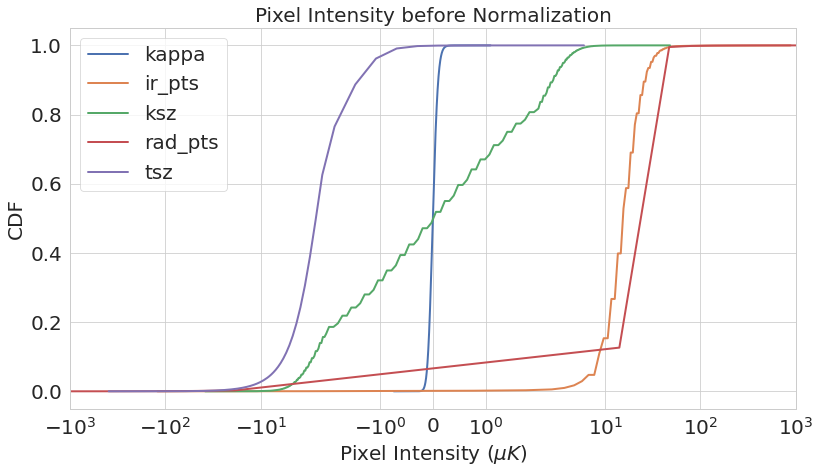

In [3]:

fig = plt.figure(figsize=(13, 7))
ax = fig.gca()
for key in hists_org.keys():
    hist = hists_org[key]['hist']
    bins = hists_org[key]["bin_center"]
    nsum = np.sum(hist)
    hist = hist/nsum
    x = np.linspace(bins[0],bins[-1],len(hist))
    cdf = np.zeros(len(x ))
    for i, lmin in enumerate(x):
        loc = np.where(bins<lmin)
        cdf[i] = np.sum(hist[loc])    
    plt.plot(x, cdf, label=key, alpha=1, lw=2)
plt.title("Pixel Intensity before Normalization", fontsize=20)
plt.xlabel(r"Pixel Intensity ($\mu K$)", fontsize=20)
plt.ylabel("CDF", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(fontsize=20)
plt.ylim(-0.05,1.05)
plt.xlim(-1e3,1e3)
plt.xscale("symlog")
plt.yscale("linear")
plt.show()

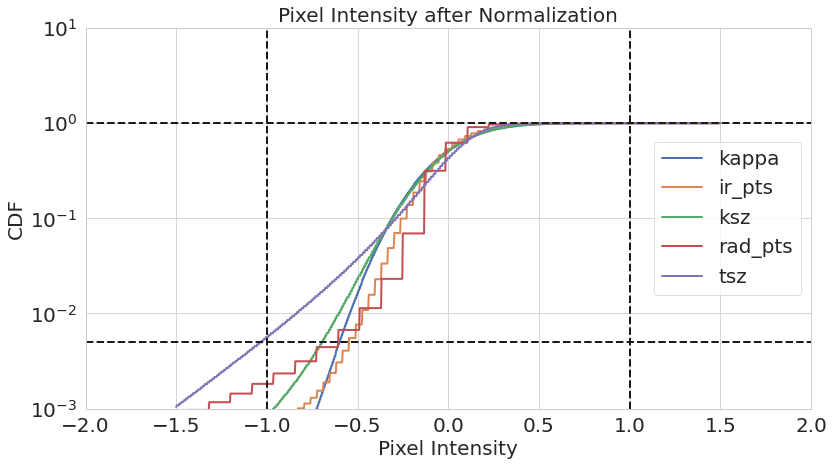

In [25]:
fig = plt.figure(figsize=(13, 7))
ax = fig.gca()
for key in hists_norm.keys():
    hist = hists_norm[key]['hist']
    bins = hists_norm[key]["bin_center"]
    nsum = np.sum(hist)
    hist = hist/nsum
    x = np.linspace(-3,3,len(hist))
    cdf = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins<lmin)
        cdf[i] = np.sum(hist[loc])
    #std = norm_info[key]["std"]

    plt.plot(x*2/4, cdf, label=key, alpha=1, lw=2)
plt.title("Pixel Intensity after Normalization", fontsize=20)
plt.xlabel("Pixel Intensity", fontsize=20)
plt.ylabel("CDF", fontsize=20)
plt.xlim(-2,2)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(fontsize=20)
plt.ylim(1e-3,10)
#plt.ylim(0.99,1.01)
plt.axvline(x=1, ls="--", lw=2, color="k")
plt.axvline(x=-1, ls="--", lw=2, color="k")
plt.axhline(y=5e-3, ls="--", lw=2, color="k")
plt.axhline(y=0.995, ls="--", lw=2, color="k")
plt.yscale("log")
plt.show()

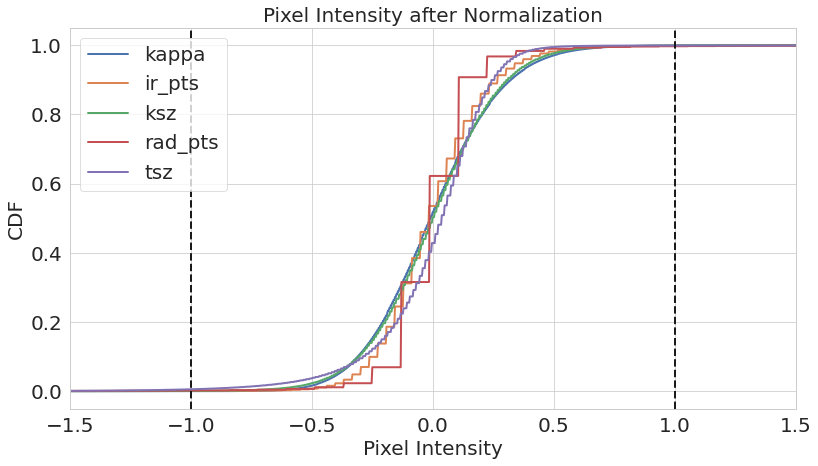

In [30]:
fig = plt.figure(figsize=(13, 7))
ax = fig.gca()
for key in hists_norm.keys():
    hist = hists_norm[key]['hist']
    bins = hists_norm[key]["bin_center"]
    nsum = np.sum(hist)
    hist = hist/nsum
    x = np.linspace(-3,3,len(hist))
    cdf = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins<lmin)
        cdf[i] = np.sum(hist[loc])    
    plt.plot(x/2, cdf, label=key, alpha=1, lw=2)
plt.title("Pixel Intensity after Normalization", fontsize=20)
plt.xlabel("Pixel Intensity", fontsize=20)
plt.ylabel("CDF", fontsize=20)
plt.xlim(-1.5,1.5)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(fontsize=20)
plt.ylim(-0.05,1.05)
plt.axvline(x=1, ls="--", lw=2, color="k")
plt.axvline(x=-1, ls="--", lw=2, color="k")
plt.yscale("linear")
plt.show()

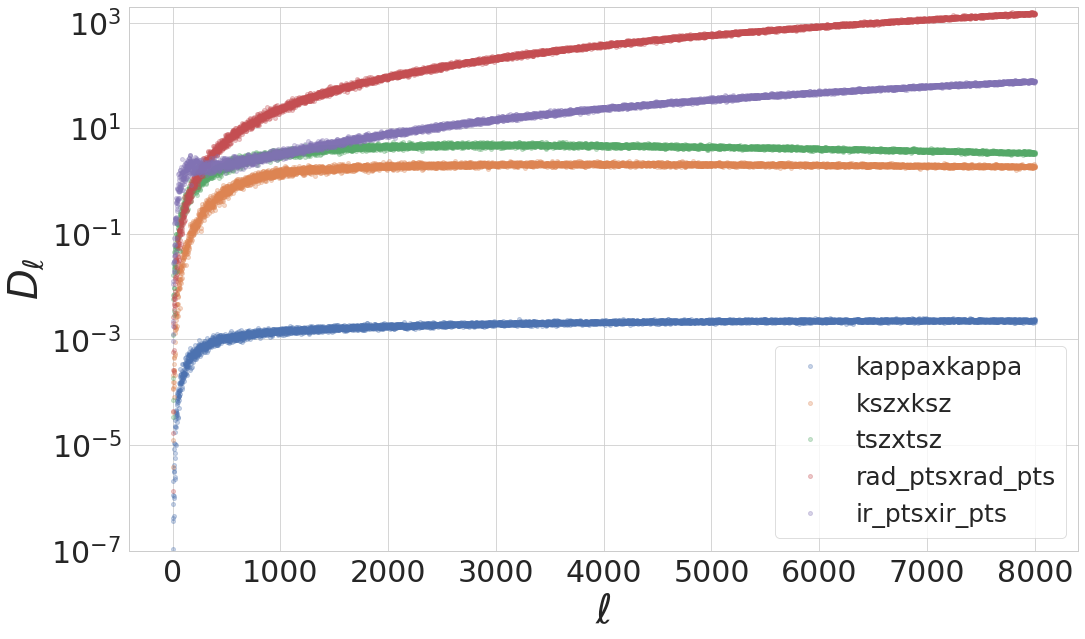

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


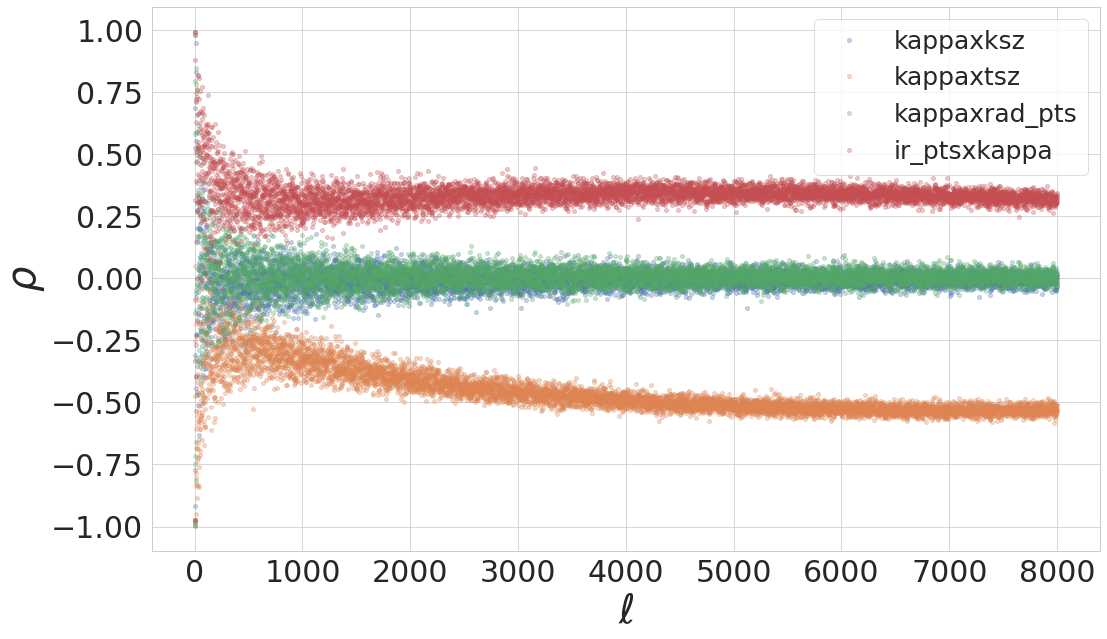

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


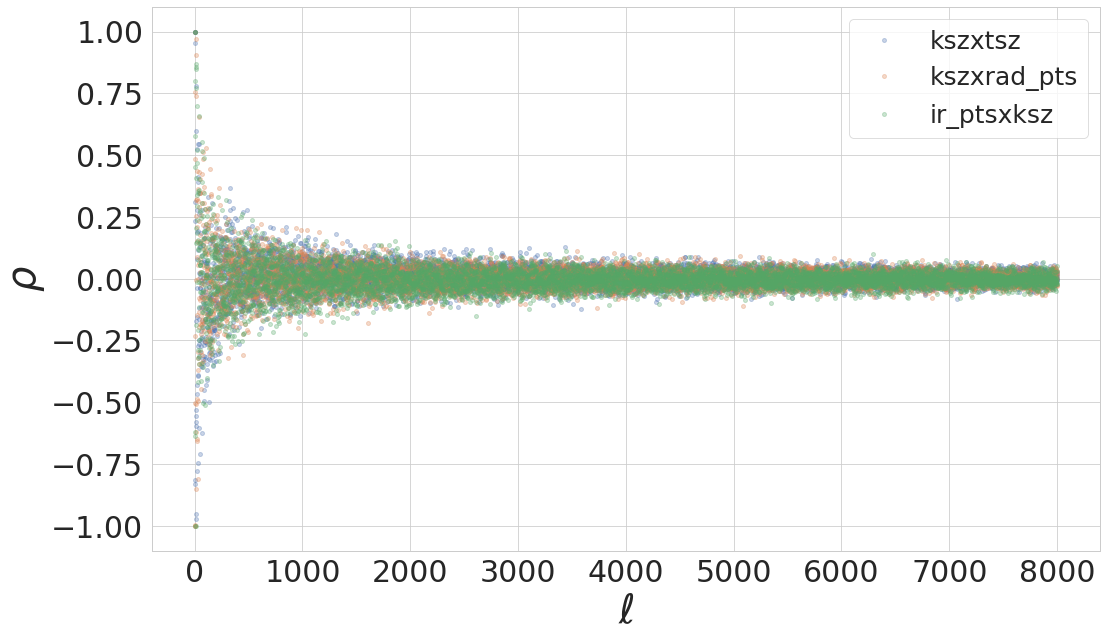

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


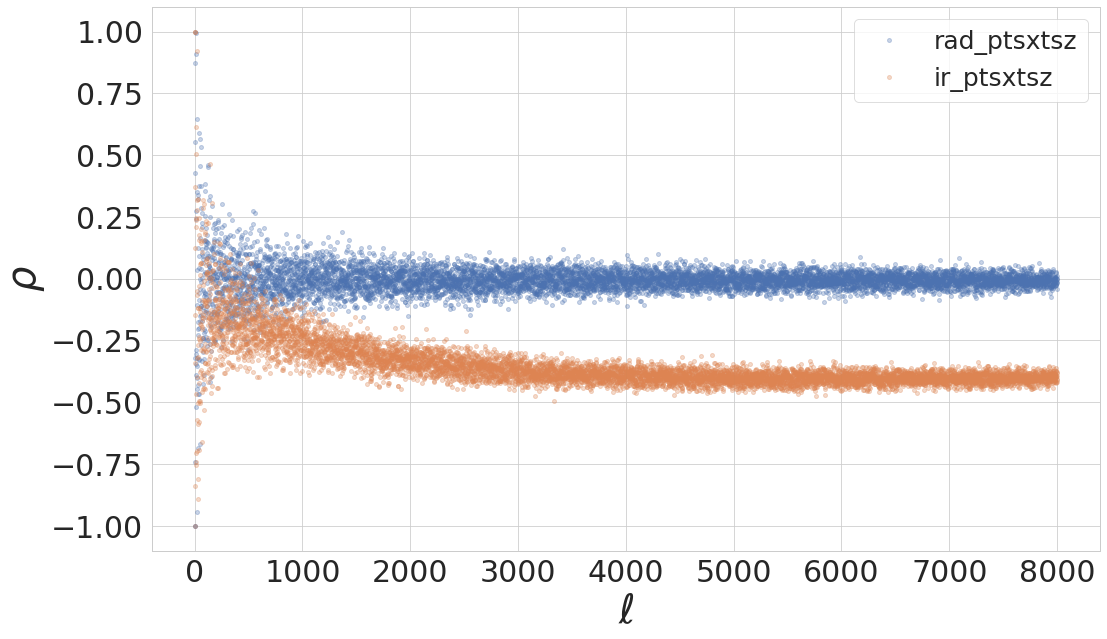

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


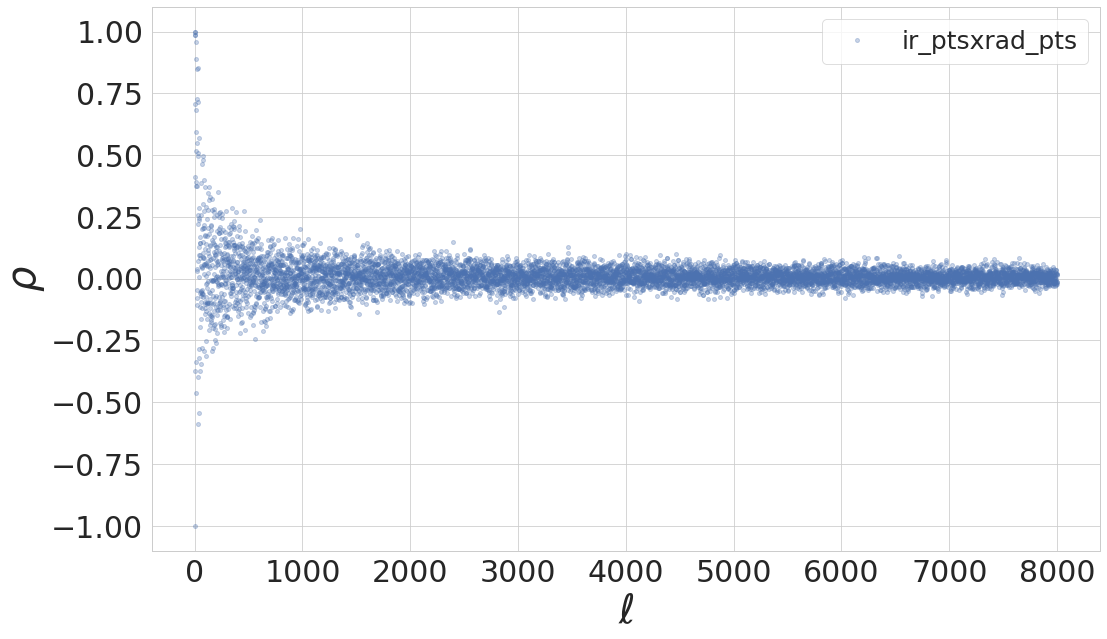

In [5]:
def get_spectra(key1, key2, spectra=spectra):
    key = [key1, key2]
    key.sort()
    key = "x".join(key)
    if key in spectra:
        l = spectra["l"].copy()
        dls = spectra[key].copy()
    else:
        print("taking {}".format(key))
        sehgal_dir = "/home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/inputs/microwaveSky"
        SEHGAL10 = sehgal.SehgalSky2010(path=sehgal_dir, data_type='alm')
        rfs = {"kappa": lambda : SEHGAL10.get_kappa(),
               "ksz": lambda : SEHGAL10.get_ksz(148),
               "tsz": lambda :SEHGAL10.get_tsz(148),
               "rad_pts": lambda :SEHGAL10.get_radio(148),
               "ir_pts": lambda :SEHGAL10.get_cib(148)
              }
        alm1 = np.complex128(rfs[key1]())
        alm2 = np.complex128(rfs[key2]())
        cl = hp.alm2cl(alm1, alm2)
        l = np.arange(len(cl))
        l_fact = l*(l+1)/(2*np.pi)
        dls = l_fact*cl
        spectra["l"] = np.arange(len(cl))
        spectra[key] = dls
    return (l, dls)

fig = plt.figure(figsize=(17,10))
ax = fig.gca()
compts = ["kappa", "ksz", "tsz", "rad_pts", "ir_pts"]
for key1 in compts:
    key2 = key1
    key = [key1, key2]
    key.sort()
    key = "x".join(key)
    l, dls= get_spectra(key1, key2)
    plt.plot(l, dls, alpha=0.3, label=key, ls="", marker="o", markersize=4)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.ylabel(r"$D_\ell$", fontsize=40)
plt.xlabel(r"$\ell$", fontsize=40)
plt.legend(fontsize=25)
plt.ylim(1e-7,2e3)
plt.yscale("log")
plt.show()


compts = ["kappa", "ksz", "tsz", "rad_pts", "ir_pts"]
for i in range(5-1):
    fig = plt.figure(figsize=(17,10))
    ax = fig.gca()
    for j in range(i+1,5):
        key1 = compts[i]
        key2 = compts[j]
        key = [key1, key2]
        key.sort()
        key = "x".join(key)
        l, dls_x= get_spectra(key1, key2)
        _, dls_1= get_spectra(key1, key1)
        _, dls_2= get_spectra(key2, key2)
        rho = dls_x/np.sqrt(dls_1*dls_2)
        plt.plot(l, rho, alpha=0.3, label=key, ls="", marker="o", markersize=4)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=30)
    plt.ylabel(r"$\rho$", fontsize=40)
    plt.xlabel(r"$\ell$", fontsize=40)
    plt.legend(fontsize=25)
    plt.show()



In [105]:
np.savez(data_path("spectra.npz"), **spectra)

In [147]:
len(spectra)

16